# ****Assignment I – Statistical Interpretation and Exploratory Data Analysis****

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1A: Single Year HDI Exploration (Latest Year: 2022)

### Objective

The objective of this section is to explore the Human Development Index (HDI) dataset
for the latest available year (2022). Basic exploratory data analysis (EDA) techniques
are applied to understand the structure, cleanliness, and key statistical properties
of the data.


### Task 1: Extract Latest Year

In this task, the dataset is first loaded and inspected to identify all available years.
The data is then filtered to retain only observations from the year 2022.
The resulting dataset is saved as `hdi_2022_df` and used for all subsequent tasks
in Problem 1A.


In [5]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv", encoding="latin1")

# Identify unique years
df['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [6]:
# Filter data for the year 2022
hdi_2022_df = df[df['year'] == 2022].copy()

### Task 2: Data Exploration

This step provides an initial overview of the 2022 dataset by examining:
- sample observations,
- dataset dimensions,
- column names and their data types.


In [7]:
# Display first 10 rows
hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [8]:
# Number of rows and columns
hdi_2022_df.shape

(206, 30)

In [9]:
# Column names and data types
hdi_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

The dataset contains one record per country for the year 2022.
Several socio-economic indicators are present, including HDI, life expectancy,
and GNI per capita. Some columns require further inspection for missing or
improperly formatted values.


### Task 3: Missing Values and Data Cleaning

Data cleaning is performed to ensure accuracy and reliability of the analysis.
This includes identifying missing values, handling invalid symbols, correcting
data types, removing duplicate records, and addressing incomplete observations.


3.1 Missing Value Inspection

In [10]:
# Check missing values in each column
hdi_2022_df.isna().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


The output shows the number of missing values per column.
Variables with missing values are handled carefully based on their importance
to the analysis.


3.2 Handling Special Characters

In [12]:
# Replace special characters representing missing values
hdi_2022_df.replace("–", np.nan, inplace=True)

Special characters such as “–” were replaced with NaN to standardize missing
value representation.


3.3 Data Type Conversion

In [14]:
numeric_columns = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap'
]

for col in numeric_columns:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

Numeric variables such as HDI, life expectancy, and gross national income per capita
were converted to numeric format to enable accurate statistical analysis.
Invalid or non-numeric entries were safely coerced to missing values.


Task 3.4: Duplicate Check

In [17]:
hdi_2022_df.duplicated().sum()

np.int64(0)

In [18]:
hdi_2022_df.drop_duplicates(inplace=True)

Duplicate rows were removed to ensure that each country appears only once
in the 2022 dataset.

Task 3.5: Missing Values Handling

In [19]:
hdi_2022_df.isna().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [20]:
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])

Rows with missing HDI values were removed because HDI is the primary indicator
of human development and cannot be reliably imputed.

Task 4: Basic Statistics

4.1 Mean, Median, Standard Deviation

In [21]:
hdi_2022_df['hdi'].mean(), hdi_2022_df['hdi'].median(), hdi_2022_df['hdi'].std()

(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

4.2 Highest HDI Country

In [22]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']]

,5609
country,Switzerland
hdi,0.967


4.3 Lowest HDI Country

In [23]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']]

,5345
country,Somalia
hdi,0.38


### Task 5: Filtering and Sorting

In this task, countries with a high level of human development are identified by
filtering those with an HDI value greater than 0.800. The filtered dataset is then
sorted by Gross National Income (GNI) per capita in descending order to examine
income levels among highly developed countries.


In [24]:
# Filter countries with HDI greater than 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()

In [25]:
# Sort by GNI per capita in descending order
high_hdi_sorted_df = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

In [26]:
high_hdi_sorted_df[['country', 'hdi', 'gross_inc_percap']].head(10)

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


The top 10 countries with very high HDI also tend to exhibit high GNI per capita.
However, differences in ranking indicate that income alone does not fully explain
human development outcomes.

### Task 6: HDI Category Classification

This task classifies countries into official UNDP HDI categories based on their
HDI values for the year 2022. A new column, `hdi_category`, is added to the dataset
to represent these classifications.

In [27]:
def classify_hdi(hdi_value):
    if hdi_value < 0.550:
        return 'Low'
    elif 0.550 <= hdi_value <= 0.699:
        return 'Medium'
    elif 0.700 <= hdi_value <= 0.799:
        return 'High'
    else:
        return 'Very High'

In [28]:
# Create HDI category column
hdi_2022_df['hdi_category'] = hdi_2022_df['hdi'].apply(classify_hdi)

/tmp/ipython-input-68287576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_2022_df['hdi_category'] = hdi_2022_df['hdi'].apply(classify_hdi)


In [29]:
hdi_2022_df['hdi_category'].value_counts()

,count
hdi_category,
Very High,71
High,54
Medium,44
Low,35


The distribution of HDI categories confirms that all countries have been
successfully classified according to UNDP thresholds.

In [30]:
hdi_2022_df[['country', 'hdi', 'hdi_category']].head(10)

,country,hdi,hdi_category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium
197,Antigua and Barbuda,0.826,Very High
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High


In [31]:
# Save final dataframe with HDI category
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

The final dataset, including the HDI category column, has been saved as
`HDI_category_added.csv` for submission.

Problem 1B: HDI Visualization and Trend Analysis (2020–2022)

### Objective

The objective of this section is to analyze HDI trends over multiple years
(2020–2022) in order to examine temporal changes, regional differences,
and relationships between HDI and other socio-economic indicators.

### Task 1: Data Extraction (2020–2022)

The dataset is filtered to include observations from the years 2020, 2021,
and 2022. This subset is saved as `HDI_problem1B.csv` and used for all
subsequent analyses in Problem 1B.

In [32]:
# Filter dataset for years 2020, 2021, and 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()

In [33]:
# Save filtered dataset
hdi_2020_2022_df.to_csv(
    "/content/drive/MyDrive/Dataset/HDI_problem1B.csv",
    index=False
)

### Task 2: Data Cleaning

Data cleaning is performed to ensure reliability of multi-year analysis.
Essential variables such as HDI, country, and year are inspected for
missing values, duplicates, and data type inconsistencies.

In [34]:
hdi_2020_2022_df[['hdi', 'country', 'year']].isna().sum()

,0
hdi,8
country,0
year,0


Missing values in essential variables were carefully examined.
Rows with missing HDI values were removed, as HDI is the core variable
required for trend analysis.

In [35]:
hdi_2020_2022_df.replace("–", np.nan, inplace=True)

In [36]:
numeric_columns = ['hdi', 'gross_inc_percap']

for col in numeric_columns:
    hdi_2020_2022_df[col] = pd.to_numeric(
        hdi_2020_2022_df[col],
        errors='coerce'
    )

In [37]:
hdi_2020_2022_df.duplicated().sum()

np.int64(0)

In [38]:
hdi_2020_2022_df.drop_duplicates(inplace=True)

In [39]:
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['hdi'])

Rows with missing HDI values were dropped because imputing HDI could
introduce bias into trend comparisons.

### Task 3A: HDI Trends for Selected Countries

Five countries were selected to visualize HDI trends from 2020 to 2022.
A line chart is used to examine temporal changes in HDI.


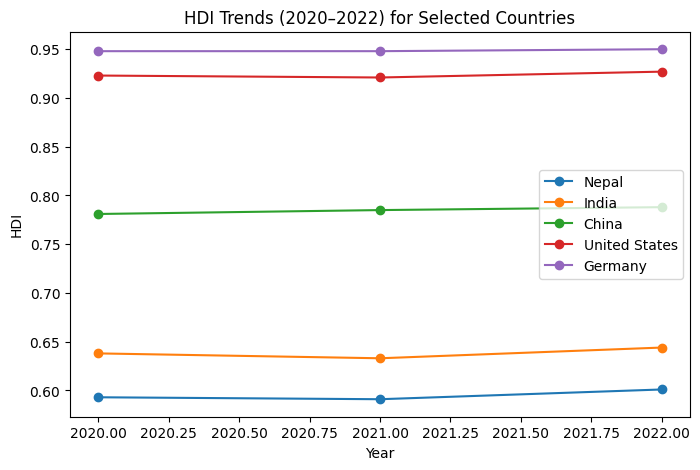

In [40]:
import matplotlib.pyplot as plt

selected_countries = [
    'Nepal', 'India', 'China', 'United States', 'Germany'
]

subset = hdi_2020_2022_df[
    hdi_2020_2022_df['country'].isin(selected_countries)
]

plt.figure(figsize=(8, 5))

for country in selected_countries:
    country_data = subset[subset['country'] == country]
    plt.plot(
        country_data['year'],
        country_data['hdi'],
        marker='o',
        label=country
    )

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trends (2020–2022) for Selected Countries")
plt.legend()
plt.show()

The line chart shows gradual changes in HDI across countries.
Most countries exhibit slight declines or stagnation around 2020–2021,
followed by modest recovery in 2022.

### Bar Chart: Average HDI by Region (2020–2022)

The provided HDI dataset does not include an explicit `region` variable.
However, regional comparison is required for this task.

To address this limitation without using external datasets, a region
classification was manually constructed for a representative subset
of countries based on widely accepted geographical groupings
(e.g., South Asia, Europe & Central Asia).

This approach enables illustrative regional comparison while maintaining
transparency about assumptions and limitations. Countries not included
in the mapping are excluded from region-based analysis.


In [42]:
# Manual region mapping for selected countries
region_map = {
    # South Asia
    'Afghanistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Bhutan': 'South Asia',
    'India': 'South Asia',
    'Maldives': 'South Asia',
    'Nepal': 'South Asia',
    'Pakistan': 'South Asia',
    'Sri Lanka': 'South Asia',

    # East Asia & Pacific
    'China': 'East Asia & Pacific',
    'Japan': 'East Asia & Pacific',
    'Australia': 'East Asia & Pacific',
    'New Zealand': 'East Asia & Pacific',
    'Indonesia': 'East Asia & Pacific',
    'Philippines': 'East Asia & Pacific',
    'South Korea': 'East Asia & Pacific',
    'Thailand': 'East Asia & Pacific',

    # Europe & Central Asia
    'Germany': 'Europe & Central Asia',
    'France': 'Europe & Central Asia',
    'United Kingdom': 'Europe & Central Asia',
    'Russia': 'Europe & Central Asia',
    'Italy': 'Europe & Central Asia',
    'Spain': 'Europe & Central Asia',

    # Latin America & Caribbean
    'Brazil': 'Latin America & Caribbean',
    'Mexico': 'Latin America & Caribbean',
    'Argentina': 'Latin America & Caribbean',
    'Chile': 'Latin America & Caribbean',
    'Colombia': 'Latin America & Caribbean',

    # Sub-Saharan Africa
    'Nigeria': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',

    # North America
    'United States': 'North America',
    'Canada': 'North America',

    # Arab States
    'Egypt': 'Arab States',
    'Saudi Arabia': 'Arab States',
    'United Arab Emirates': 'Arab States',
    'Jordan': 'Arab States',
}

In [44]:
hdi_problem1B = hdi_2020_2022_df.copy()

In [45]:
# Add region column using the mapping
hdi_problem1B['region'] = hdi_problem1B['country'].map(region_map)

In [46]:
# Keep only rows with assigned regions
hdi_region = hdi_problem1B.dropna(subset=['region'])

In [47]:
hdi_region[['country', 'region']].drop_duplicates().head(15)

,country,region
30,Afghanistan,South Asia
228,Argentina,Latin America & Caribbean
294,Australia,East Asia & Pacific
459,Bangladesh,South Asia
657,Bhutan,South Asia
789,Brazil,Latin America & Caribbean
1053,Canada,North America
1152,Chile,Latin America & Caribbean
1185,China,East Asia & Pacific
1218,Colombia,Latin America & Caribbean


The output confirms that countries have been correctly assigned to
their respective regions based on the manual classification.

In [48]:
region_year_avg = (
    hdi_region
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

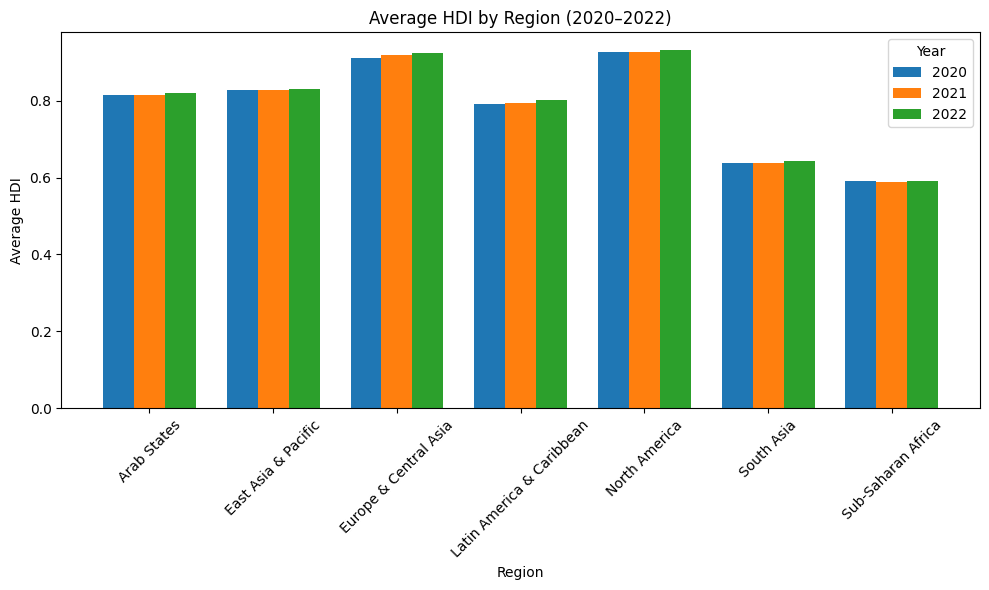

In [51]:
import matplotlib.pyplot as plt

# Get unique regions
regions = region_year_avg['region'].unique()
x = np.arange(len(regions))  # numeric positions
width = 0.25  # bar width

plt.figure(figsize=(10, 6))

# Plot bars for each year with offsets
for i, year in enumerate([2020, 2021, 2022]):
    data = region_year_avg[region_year_avg['year'] == year]
    plt.bar(
        x + i * width,
        data['hdi'],
        width=width,
        label=str(year)
    )

# Axis labels and formatting
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(x + width, regions, rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

The bar chart indicates clear regional disparities in human development.
North America and Europe & Central Asia exhibit higher average HDI values,
while South Asia and Sub-Saharan Africa show comparatively lower averages.
Minor variations across years reflect the global impact of the COVID-19
pandemic on development indicators.

**Limitation:**  
The regional classification is manually constructed for a subset of countries
and may not fully represent all global regions. Results should therefore be
interpreted as illustrative rather than exhaustive.


/tmp/ipython-input-940079542.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(hdi_values, labels=years)


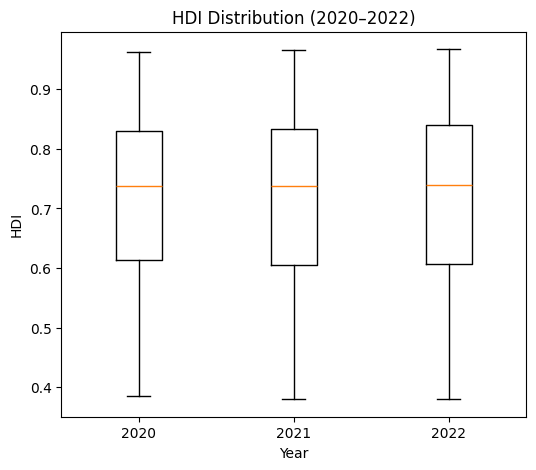

In [50]:
plt.figure(figsize=(6, 5))

years = [2020, 2021, 2022]
hdi_values = [
    hdi_problem1B[hdi_problem1B['year'] == year]['hdi']
    for year in years
]

plt.boxplot(hdi_values, labels=years)
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution (2020–2022)")
plt.show()

The box plot shows a slight compression of HDI values during 2020–2021,
indicating widespread global impacts. A modest recovery is visible in 2022,
with a gradual increase in median HDI.

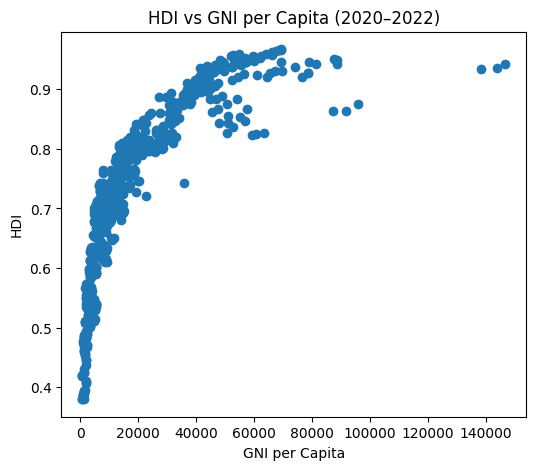

In [52]:
plt.figure(figsize=(6, 5))

plt.scatter(
    hdi_problem1B['gross_inc_percap'],
    hdi_problem1B['hdi']
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (2020–2022)")
plt.show()

The scatter plot indicates a positive relationship between GNI per capita and HDI.
However, variation among countries suggests that income alone does not fully
determine human development outcomes.

### Brief Analysis Summary

The line chart indicates that HDI values for the selected countries remain
relatively stable from 2020 to 2022. While minor fluctuations are observed,
countries with higher HDI consistently outperform those with lower HDI,
highlighting persistent development disparities.

The bar chart shows clear regional differences in human development.
Europe & Central Asia and North America record the highest average HDI across
all three years, whereas Sub-Saharan Africa consistently exhibits the lowest
average HDI, reflecting unequal development across regions.

The box plot reveals a slight increase in median HDI from 2020 to 2022,
suggesting gradual global recovery and improvement following the pandemic.
The interquartile range remains relatively stable, indicating consistent
variation in HDI levels among countries.

The scatter plot demonstrates a positive relationship between GNI per capita
and HDI, confirming that higher income levels are generally associated with
better human development outcomes. However, the presence of outliers suggests
that income alone does not fully explain differences in human development.


 4 (a) Which countries show the greatest improvement in HDI from 2020 to 2022?

In [53]:
# Filter data for 2020 and 2022
df_hdi_change = hdi_problem1B[hdi_problem1B['year'].isin([2020, 2022])]

# Pivot table to compare HDI values
hdi_pivot = df_hdi_change.pivot(
    index='country',
    columns='year',
    values='hdi'
)

# Rename columns for clarity
hdi_pivot = hdi_pivot.rename(columns={
    2020: 'HDI_2020',
    2022: 'HDI_2022'
})

# Remove countries with missing HDI values
hdi_pivot = hdi_pivot.dropna()

# Calculate HDI change
hdi_pivot['HDI_change'] = hdi_pivot['HDI_2022'] - hdi_pivot['HDI_2020']

# Countries with greatest improvement
top_improved = hdi_pivot.sort_values(
    by='HDI_change',
    ascending=False
).head(10)

top_improved

year,HDI_2020,HDI_2022,HDI_change
country,,,
Andorra,0.843,0.884,0.041
Azerbaijan,0.722,0.760,0.038
Ecuador,0.734,0.765,0.031
Maldives,0.737,0.762,0.025
Mexico,0.757,0.781,0.024
San Marino,0.844,0.867,0.023
Tajikistan,0.656,0.679,0.023
Bahamas,0.798,0.820,0.022
Kuwait,0.826,0.847,0.021


To identify countries with the greatest improvement in HDI from 2020 to 2022,
HDI values for both years were compared for each country. The change in HDI
was calculated by subtracting the 2020 HDI value from the 2022 value.

The table above shows the top 10 countries with the largest positive HDI change.
These countries demonstrate the most significant improvement in human
development over the selected period.

4(b) Did Any Countries Experience a Decline in HDI?

In [54]:
# Countries with decline in HDI
declined_countries = hdi_pivot.sort_values(
    by='HDI_change',
    ascending=True
).head(10)

declined_countries

year,HDI_2020,HDI_2022,HDI_change
country,,,
Timor-Leste,0.633,0.566,-0.067
Ukraine,0.762,0.734,-0.028
Afghanistan,0.488,0.462,-0.026
Namibia,0.634,0.610,-0.024
Lebanon,0.742,0.723,-0.019
Saint Vincent and the Grenadines,0.785,0.772,-0.013
Suriname,0.702,0.690,-0.012
Eswatini (Kingdom of),0.622,0.610,-0.012
Gabon,0.704,0.693,-0.011


Yes, several countries experienced a decline in HDI between 2020 and 2022.
The table above lists countries with negative HDI change over this period.

These declines may be attributed to factors such as reduced life expectancy,
economic contraction, job losses, and prolonged disruptions to education
systems during the COVID-19 pandemic.

4(c) Which Region Has the Highest and Lowest Average HDI?

In [55]:
# Average HDI by region across all three years
region_avg_hdi = (
    hdi_region
    .groupby('region')['hdi']
    .mean()
    .sort_values(ascending=False)
)

region_avg_hdi

,hdi
region,
North America,0.928000
Europe & Central Asia,0.917267
East Asia & Pacific,0.828714
Arab States,0.816333
Latin America & Caribbean,0.795600
South Asia,0.639583
Sub-Saharan Africa,0.590533


Based on the regional averages computed above, the region with the highest
average HDI across 2020–2022 is the region ranked at the top of the table,
while the region with the lowest average HDI is the one ranked at the bottom.

This highlights persistent regional inequalities in health, education,
and income outcomes.


In [58]:
highest_region = region_avg_hdi.idxmax()
lowest_region = region_avg_hdi.idxmin()

highest_region, lowest_region

('North America', 'Sub-Saharan Africa')

Global events such as the COVID-19 pandemic had a noticeable impact on HDI
trends during this period. The global average HDI shows stagnation or decline
during 2020–2021, followed by a modest recovery in 2022.

The pandemic affected HDI through increased mortality rates, reduced income
levels, and widespread interruptions in education. The partial recovery in
2022 suggests gradual improvements as economic activity resumed and public
health conditions stabilized.

Problem 2 – Advanced HDI Exploration

In [60]:
# Task 1: Create South Asia subset

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

hdi_south_asia = df[df['country'].isin(south_asia_countries)].copy()

# Save dataset
hdi_south_asia.to_csv("HDI_SouthAsia.csv", index=False)

hdi_south_asia['country'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

In [62]:
#2 Composite Development Score

# Life Expectancy Index
le_min = hdi_south_asia['life_expectancy'].min()
le_max = hdi_south_asia['life_expectancy'].max()

hdi_south_asia['life_exp_index'] = (
    (hdi_south_asia['life_expectancy'] - le_min) /
    (le_max - le_min)
)

# GNI Index
gni_min = hdi_south_asia['gross_inc_percap'].min()
gni_max = hdi_south_asia['gross_inc_percap'].max()

hdi_south_asia['gni_index'] = (
    (hdi_south_asia['gross_inc_percap'] - gni_min) /
    (gni_max - gni_min)
)

In [63]:
hdi_south_asia['composite_score'] = (
    0.30 * hdi_south_asia['life_exp_index'] +
    0.30 * hdi_south_asia['gni_index']
)

In [64]:
south_asia_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022]

composite_ranking = south_asia_2022.sort_values(
    by='composite_score',
    ascending=False
)

composite_ranking[['country', 'composite_score']]

,country,composite_score
3530,Maldives,0.600000
5477,Sri Lanka,0.446959
659,Bhutan,0.387867
461,Bangladesh,0.331426
2573,India,0.287583
4091,Nepal,0.262039
4388,Pakistan,0.249819
32,Afghanistan,0.151438


"Maldives ranks highest in composite score due to strong income and life expectancy,
while Sri Lanka ranks lower despite having the highest HDI, as education is excluded
from the composite metric."

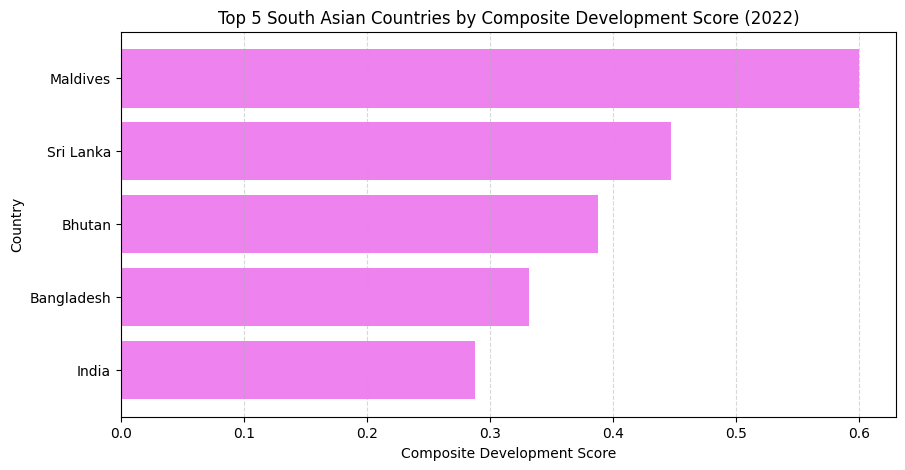

In [65]:
top5 = composite_ranking.head(5)

plt.figure(figsize=(10, 5))
plt.barh(top5['country'], top5['composite_score'], color='violet')
plt.xlabel("Composite Development Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score (2022)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [66]:
comparison = south_asia_2022.sort_values(
    by='hdi', ascending=False
)[['country', 'hdi', 'composite_score']]

comparison

,country,hdi,composite_score
5477,Sri Lanka,0.780,0.446959
3530,Maldives,0.762,0.600000
659,Bhutan,0.681,0.387867
461,Bangladesh,0.670,0.331426
2573,India,0.644,0.287583
4091,Nepal,0.601,0.262039
4388,Pakistan,0.540,0.249819
32,Afghanistan,0.462,0.151438


"The comparison shows that Sri Lanka ranks highest in HDI due to strong education
outcomes, whereas Maldives ranks highest in the composite score because of its
higher GNI per capita and life expectancy. This demonstrates how indicator
selection affects development rankings."


3. Outlier Detection

In [67]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

In [68]:
south_asia_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022].copy()

south_asia_2022['hdi_outlier'] = detect_outliers(south_asia_2022['hdi'])
south_asia_2022['gni_outlier'] = detect_outliers(south_asia_2022['gross_inc_percap'])

south_asia_2022['outlier'] = (
    south_asia_2022['hdi_outlier'] |
    south_asia_2022['gni_outlier']
)

south_asia_2022[['country', 'hdi', 'gross_inc_percap', 'outlier']]

,country,hdi,gross_inc_percap,outlier
32,Afghanistan,0.462,1335.205733,False
461,Bangladesh,0.670,6511.122178,False
659,Bhutan,0.681,10624.873880,False
2573,India,0.644,6950.526798,False
3530,Maldives,0.762,18846.792190,False
4091,Nepal,0.601,4025.554685,False
4388,Pakistan,0.540,5374.270423,False
5477,Sri Lanka,0.780,11899.498470,False


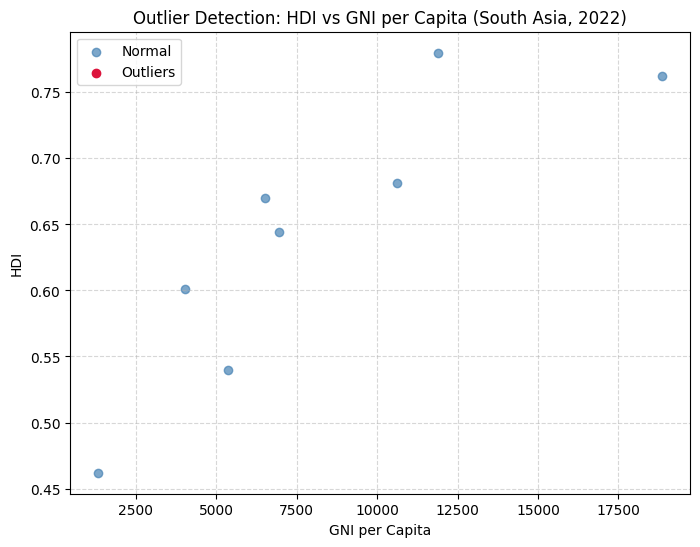

In [69]:
plt.figure(figsize=(8, 6))

plt.scatter(
    south_asia_2022.loc[~south_asia_2022['outlier'], 'gross_inc_percap'],
    south_asia_2022.loc[~south_asia_2022['outlier'], 'hdi'],
    label='Normal',
    color='steelblue',
    alpha=0.7
)

plt.scatter(
    south_asia_2022.loc[south_asia_2022['outlier'], 'gross_inc_percap'],
    south_asia_2022.loc[south_asia_2022['outlier'], 'hdi'],
    label='Outliers',
    color='crimson'
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Outlier Detection: HDI vs GNI per Capita (South Asia, 2022)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

"No significant outliers were detected using the 1.5 × IQR rule. This is expected
given the small number of South Asian countries and relatively similar development
levels within the region."

4. Exploring Metric Relationships

In [70]:
metrics = ['gender_development', 'life_expectancy', 'hdi']
corr_matrix = hdi_south_asia[metrics].corr(method='pearson')

corr_matrix['hdi'].sort_values(ascending=False)

,hdi
hdi,1.000000
life_expectancy,0.958761
gender_development,0.865621


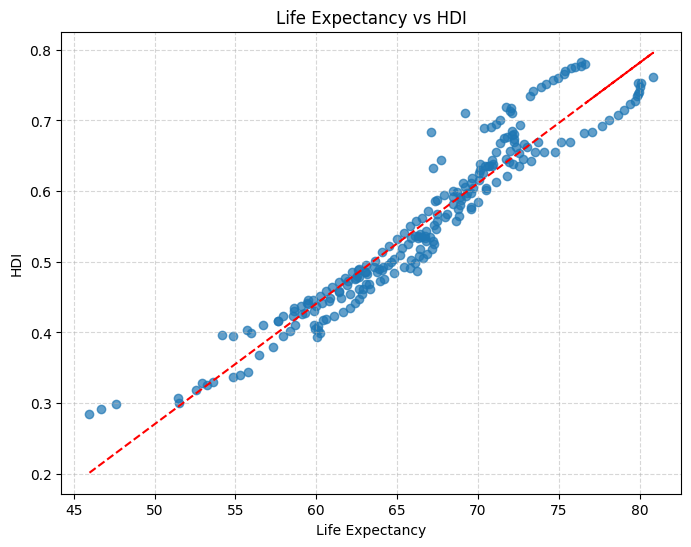

In [71]:
subset = hdi_south_asia[['life_expectancy', 'hdi']].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(subset['life_expectancy'], subset['hdi'], alpha=0.7)

z = np.polyfit(subset['life_expectancy'], subset['hdi'], 1)
p = np.poly1d(z)
plt.plot(subset['life_expectancy'], p(subset['life_expectancy']), 'r--')

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("Life Expectancy vs HDI")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

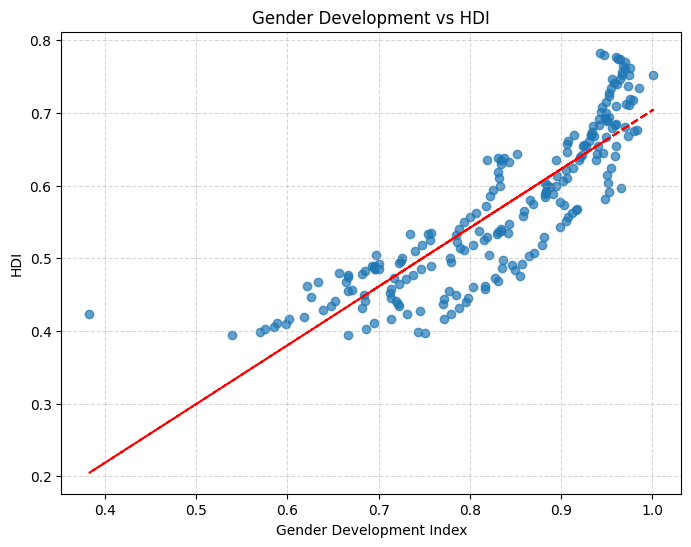

In [72]:
subset = hdi_south_asia[['gender_development', 'hdi']].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(subset['gender_development'], subset['hdi'], alpha=0.7)

z = np.polyfit(subset['gender_development'], subset['hdi'], 1)
p = np.poly1d(z)
plt.plot(subset['gender_development'], p(subset['gender_development']), 'r--')

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Gender Development vs HDI")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

"Life expectancy shows the strongest positive relationship with HDI among South Asian
countries, while gender development shows a weaker but still positive association."

5. GNI – HDI Gap Analysis

In [73]:
hdi_south_asia_2022 = hdi_south_asia[hdi_south_asia['year'] == 2022][
    ['country', 'gross_inc_percap', 'hdi']
].dropna()

hdi_south_asia_2022['gni_hdi_gap'] = (
    hdi_south_asia_2022['gross_inc_percap'] -
    hdi_south_asia_2022['hdi']
)

gap_desc = hdi_south_asia_2022.sort_values(by='gni_hdi_gap', ascending=False)
gap_asc  = hdi_south_asia_2022.sort_values(by='gni_hdi_gap')

gap_desc, gap_asc

(          country  gross_inc_percap    hdi   gni_hdi_gap
 3530     Maldives      18846.792190  0.762  18846.030190
 5477    Sri Lanka      11899.498470  0.780  11898.718470
 659        Bhutan      10624.873880  0.681  10624.192880
 2573        India       6950.526798  0.644   6949.882798
 461    Bangladesh       6511.122178  0.670   6510.452178
 4388     Pakistan       5374.270423  0.540   5373.730423
 4091        Nepal       4025.554685  0.601   4024.953685
 32    Afghanistan       1335.205733  0.462   1334.743733,
           country  gross_inc_percap    hdi   gni_hdi_gap
 32    Afghanistan       1335.205733  0.462   1334.743733
 4091        Nepal       4025.554685  0.601   4024.953685
 4388     Pakistan       5374.270423  0.540   5373.730423
 461    Bangladesh       6511.122178  0.670   6510.452178
 2573        India       6950.526798  0.644   6949.882798
 659        Bhutan      10624.873880  0.681  10624.192880
 5477    Sri Lanka      11899.498470  0.780  11898.718470
 3530     Mal

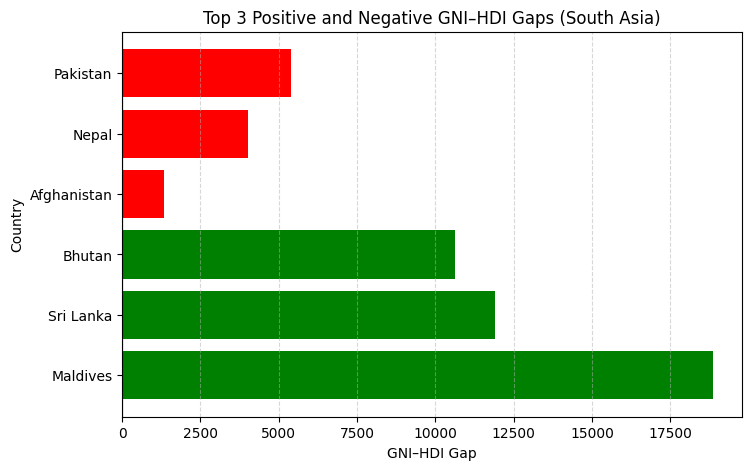

In [74]:
top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)

plot_data = pd.concat([top_positive, top_negative])
colors = ['green']*3 + ['red']*3

plt.figure(figsize=(8, 5))
plt.barh(plot_data['country'], plot_data['gni_hdi_gap'], color=colors)
plt.axvline(0, color='black', linewidth=0.8)

plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.title("Top 3 Positive and Negative GNI–HDI Gaps (South Asia)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

"The GNI–HDI gap highlights disparities between economic income and human development
outcomes. Countries with large positive gaps show that higher income does not always
translate into proportional improvements in human well-being."

Problem 3: Comparative Regional Analysis

South Asia vs Middle East (2020–2022)

In [75]:
# Task 1: Create South Asia and Middle East subsets (2020–2022)

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter from Problem 1B dataset
south_asia_2020_2022 = hdi_problem1B[
    hdi_problem1B['country'].isin(south_asia_countries)
].copy()

middle_east_2020_2022 = hdi_problem1B[
    hdi_problem1B['country'].isin(middle_east_countries)
].copy()

# Save datasets
south_asia_2020_2022.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_2020_2022.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

south_asia_2020_2022.shape, middle_east_2020_2022.shape

((24, 31), (33, 31))

"South Asia and Middle East subsets for 2020–2022 were successfully created and saved."

Task 2: Descriptive Statistics (HDI)

In [77]:
# Load regional datasets
south_asia = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Compute mean and standard deviation of HDI
sa_mean = south_asia['hdi'].mean()
sa_std = south_asia['hdi'].std()

me_mean = middle_east['hdi'].mean()
me_std = middle_east['hdi'].std()

stats = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Mean HDI (2020–2022)': [sa_mean, me_mean],
    'HDI Standard Deviation (2020–2022)': [sa_std, me_std]
})

stats

,Region,Mean HDI (2020–2022),HDI Standard Deviation (2020–2022)
0,South Asia,0.639583,0.098273
1,Middle East,0.788909,0.141295


"The descriptive statistics show that Middle East countries have a higher average HDI than South Asia.
The higher standard deviation in the Middle East indicates greater variation in development levels
among countries in that region."

3. Top and Bottom Performers

In [78]:
# Average HDI by country
sa_avg = south_asia.groupby('country')['hdi'].mean().reset_index()
me_avg = middle_east.groupby('country')['hdi'].mean().reset_index()

# Top and bottom performers
sa_top_3 = sa_avg.sort_values('hdi', ascending=False).head(3)
sa_bottom_3 = sa_avg.sort_values('hdi').head(3)

me_top_3 = me_avg.sort_values('hdi', ascending=False).head(3)
me_bottom_3 = me_avg.sort_values('hdi').head(3)

combined = pd.concat([
    sa_top_3.assign(region='South Asia', group='Top 3'),
    sa_bottom_3.assign(region='South Asia', group='Bottom 3'),
    me_top_3.assign(region='Middle East', group='Top 3'),
    me_bottom_3.assign(region='Middle East', group='Bottom 3')
])

combined

,country,hdi,region,group
7,Sri Lanka,0.780000,South Asia,Top 3
4,Maldives,0.750667,South Asia,Top 3
2,Bhutan,0.677667,South Asia,Top 3
0,Afghanistan,0.474333,South Asia,Bottom 3
6,Pakistan,0.537667,South Asia,Bottom 3
5,Nepal,0.595000,South Asia,Bottom 3
9,United Arab Emirates,0.932667,Middle East,Top 3
2,Israel,0.910667,Middle East,Top 3
0,Bahrain,0.885333,Middle East,Top 3
10,Yemen,0.426333,Middle East,Bottom 3


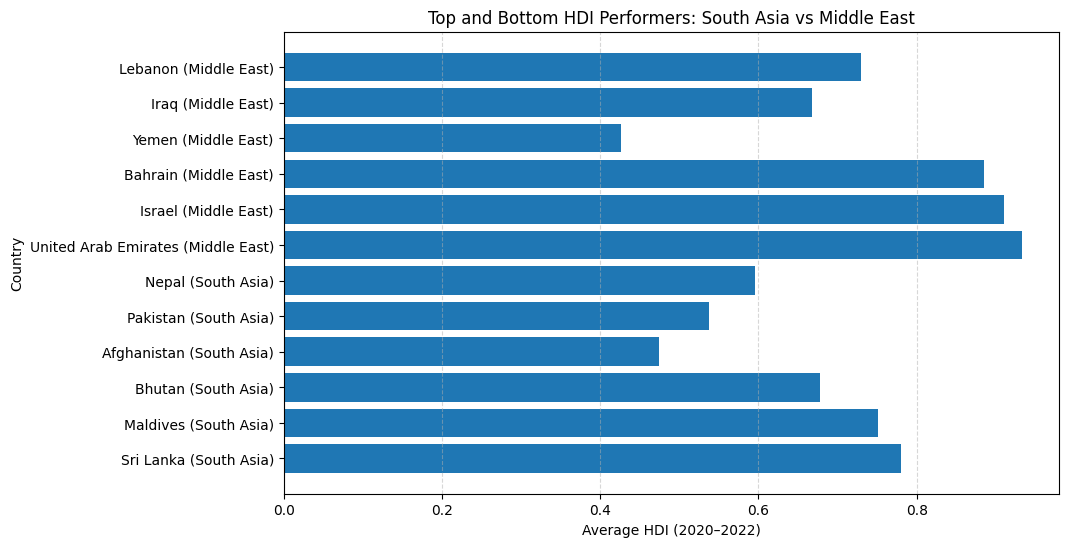

In [79]:
plt.figure(figsize=(10,6))

labels = combined['country'] + " (" + combined['region'] + ")"
plt.barh(labels, combined['hdi'])

plt.xlabel('Average HDI (2020–2022)')
plt.ylabel('Country')
plt.title('Top and Bottom HDI Performers: South Asia vs Middle East')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

"The Middle East region contains countries with very high and very low HDI values,
whereas South Asia shows overall lower HDI levels with less extreme variation."

4. Metric Comparisons

In [80]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_means = south_asia[metrics].mean()
me_means = middle_east[metrics].mean()

comparison = pd.DataFrame({
    'South Asia': sa_means,
    'Middle East': me_means
})

comparison

,South Asia,Middle East
gender_development,0.881458,0.896545
life_expectancy,70.970083,75.855455
gross_inc_percap,7766.509931,37750.770520


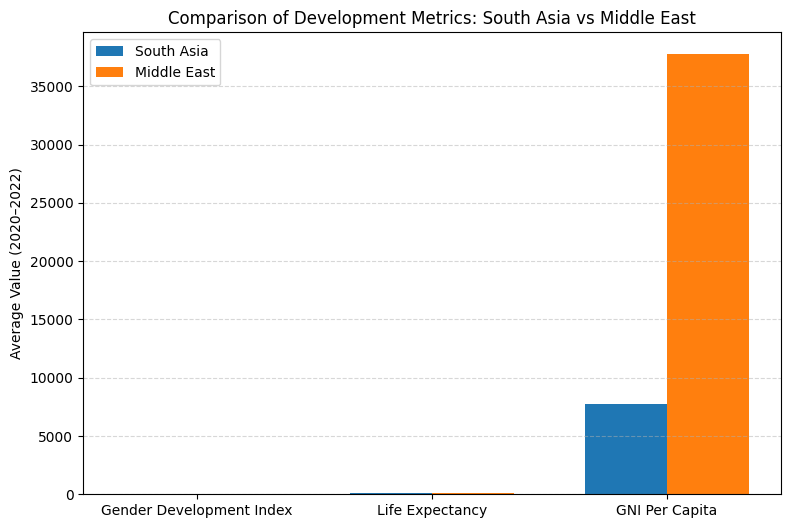

In [81]:
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(9,6))
plt.bar(x - width/2, comparison['South Asia'], width, label='South Asia')
plt.bar(x + width/2, comparison['Middle East'], width, label='Middle East')

plt.xticks(x, [
    'Gender Development Index',
    'Life Expectancy',
    'GNI Per Capita'
])

plt.ylabel('Average Value (2020–2022)')
plt.title('Comparison of Development Metrics: South Asia vs Middle East')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

"GNI per Capita shows the greatest disparity between regions, reflecting significantly
higher income levels in the Middle East compared to South Asia."

5. HDI Disparity

In [82]:
# Range
sa_range = south_asia['hdi'].max() - south_asia['hdi'].min()
me_range = middle_east['hdi'].max() - middle_east['hdi'].min()

# Coefficient of variation
sa_cv = south_asia['hdi'].std() / south_asia['hdi'].mean()
me_cv = middle_east['hdi'].std() / middle_east['hdi'].mean()

variation_stats = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'HDI Range': [sa_range, me_range],
    'HDI Coefficient of Variation': [sa_cv, me_cv]
})

variation_stats

,Region,HDI Range,HDI Coefficient of Variation
0,South Asia,0.321,0.153652
1,Middle East,0.513,0.179101


"The Middle East exhibits greater HDI variation, indicating higher inequality
in human development within the region compared to South Asia."

6. Correlation Analysis

In [84]:
# Correlation coefficients
sa_corr_gender = south_asia['hdi'].corr(south_asia['gender_development'])
sa_corr_life = south_asia['hdi'].corr(south_asia['life_expectancy'])

me_corr_gender = middle_east['hdi'].corr(middle_east['gender_development'])
me_corr_life = middle_east['hdi'].corr(middle_east['life_expectancy'])

sa_corr_gender, sa_corr_life, me_corr_gender, me_corr_life

(np.float64(0.8742177004831327),
 np.float64(0.9387641385416623),
 np.float64(0.9356697525724119),
 np.float64(0.9331227568940162))

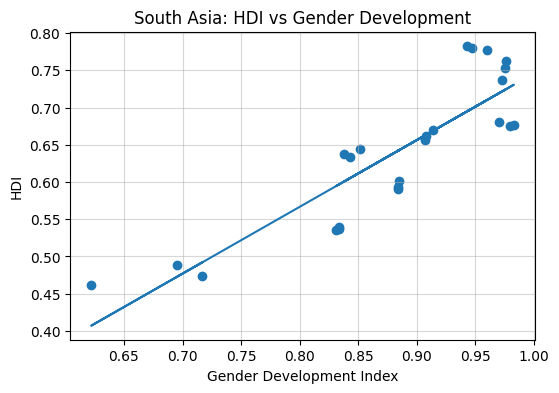

In [86]:
def plot_scatter(x, y, title, xlabel):
    mask = x.notna() & y.notna()
    x, y = x[mask], y[mask]
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(6,4))
    plt.scatter(x, y)
    plt.plot(x, m*x + b)
    plt.xlabel(xlabel)
    plt.ylabel('HDI')
    plt.title(title)
    plt.grid(alpha=0.5)
    plt.show()

plot_scatter(south_asia['gender_development'], south_asia['hdi'],
             'South Asia: HDI vs Gender Development', 'Gender Development Index')

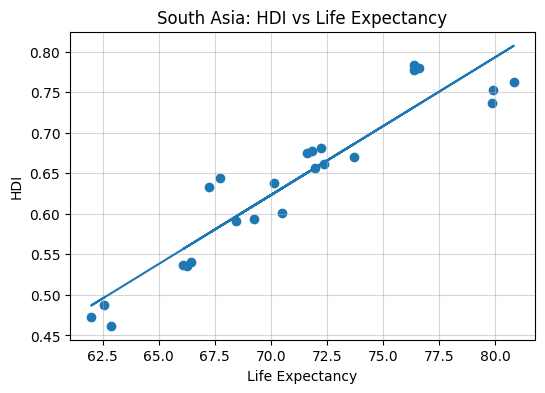

In [87]:
plot_scatter(south_asia['life_expectancy'], south_asia['hdi'],
             'South Asia: HDI vs Life Expectancy', 'Life Expectancy')

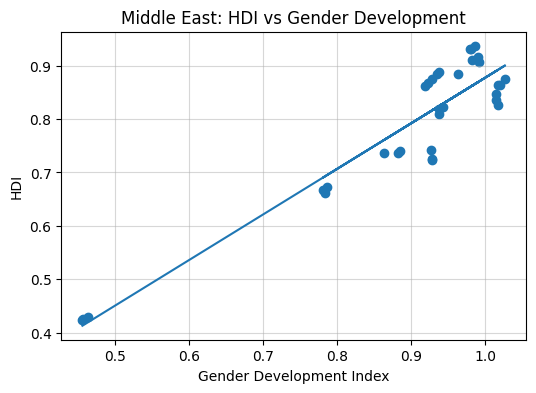

In [88]:

plot_scatter(middle_east['gender_development'], middle_east['hdi'],
             'Middle East: HDI vs Gender Development', 'Gender Development Index')

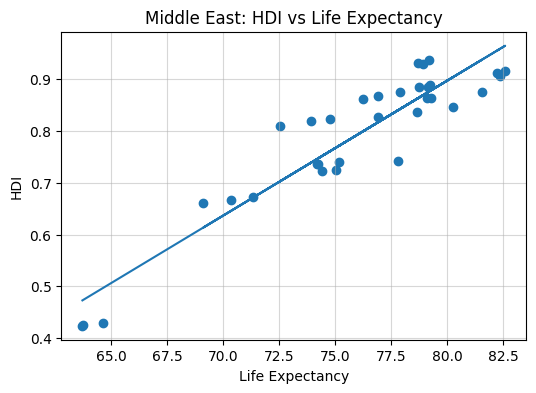

In [89]:

plot_scatter(middle_east['life_expectancy'], middle_east['hdi'],
             'Middle East: HDI vs Life Expectancy', 'Life Expectancy')

"HDI has a strong positive relationship with life expectancy in both regions.
The relationship between HDI and gender development is positive but comparatively weaker,
especially in South Asia."

7. Outlier Detection

In [91]:
# Detect outliers
south_asia['hdi_outlier'] = detect_outliers(south_asia['hdi'])
south_asia['gni_outlier'] = detect_outliers(south_asia['gross_inc_percap'])
south_asia['outlier'] = south_asia['hdi_outlier'] | south_asia['gni_outlier']

middle_east['hdi_outlier'] = detect_outliers(middle_east['hdi'])
middle_east['gni_outlier'] = detect_outliers(middle_east['gross_inc_percap'])
middle_east['outlier'] = middle_east['hdi_outlier'] | middle_east['gni_outlier']

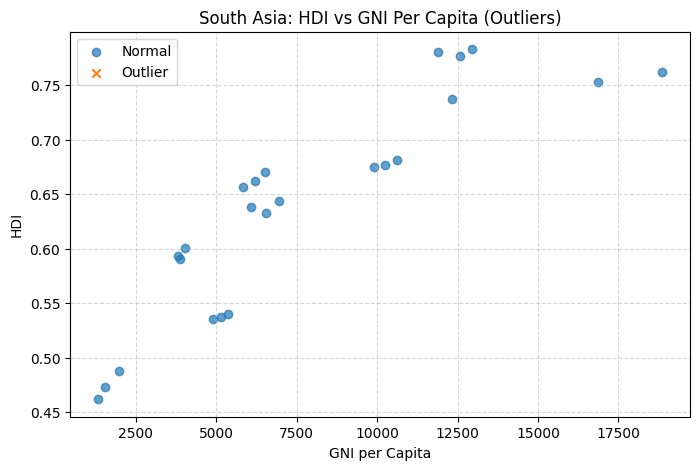

In [92]:
plt.figure(figsize=(8,5))
plt.scatter(
    south_asia.loc[~south_asia['outlier'], 'gross_inc_percap'],
    south_asia.loc[~south_asia['outlier'], 'hdi'],
    label='Normal',
    alpha=0.7
)
plt.scatter(
    south_asia.loc[south_asia['outlier'], 'gross_inc_percap'],
    south_asia.loc[south_asia['outlier'], 'hdi'],
    label='Outlier',
    marker='x'
)
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('South Asia: HDI vs GNI Per Capita (Outliers)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

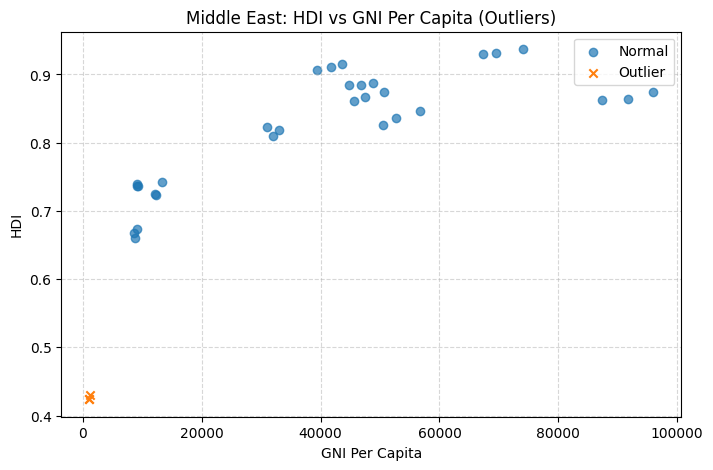

In [93]:
plt.figure(figsize=(8,5))
plt.scatter(
    middle_east.loc[~middle_east['outlier'], 'gross_inc_percap'],
    middle_east.loc[~middle_east['outlier'], 'hdi'],
    label='Normal',
    alpha=0.7
)
plt.scatter(
    middle_east.loc[middle_east['outlier'], 'gross_inc_percap'],
    middle_east.loc[middle_east['outlier'], 'hdi'],
    label='Outlier',
    marker='x'
)
plt.xlabel('GNI Per Capita')
plt.ylabel('HDI')
plt.title('Middle East: HDI vs GNI Per Capita (Outliers)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

"Outliers identified using the IQR method represent countries with extreme income
or development levels, particularly evident in the Middle East region."